<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/scatter_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [2]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


In [3]:
df['Period'] = pd.to_datetime(df['Period'])

In [4]:
df['Monthly_number_of_tourists(millions)'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste(millions)'] = df['Total_mixed_waste'] / 1000000

In [5]:
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)

In [6]:
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]
df_quarterly

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers,Monthly_number_of_tourists(millions),Total_mixed_waste(millions)
0,01 Andalucía,2015-01-01,NaN,NaN,NaN,96.637,504.6,3734660.0,4132582.0,NaN,NaN,3.734660
1,02 Aragón,2015-01-01,NaN,NaN,NaN,98.632,427.9,457726.0,532954.0,NaN,NaN,0.457726
2,"03 Asturias, Principado de",2015-01-01,NaN,NaN,NaN,97.509,519.4,404159.0,519529.0,NaN,NaN,0.404159
3,"04 Balears, Illes",2015-01-01,NaN,NaN,NaN,95.424,800.6,766736.0,892903.0,NaN,NaN,0.766736
4,05 Canarias,2015-01-01,NaN,NaN,NaN,97.087,594.1,1144978.0,1253565.0,NaN,NaN,1.144978
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,"15 Navarra, Comunidad Foral de",2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2121,16 País Vasco,2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2122,"17 Rioja, La",2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2123,Nacional,2024-10-01,8965310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.96531,NaN


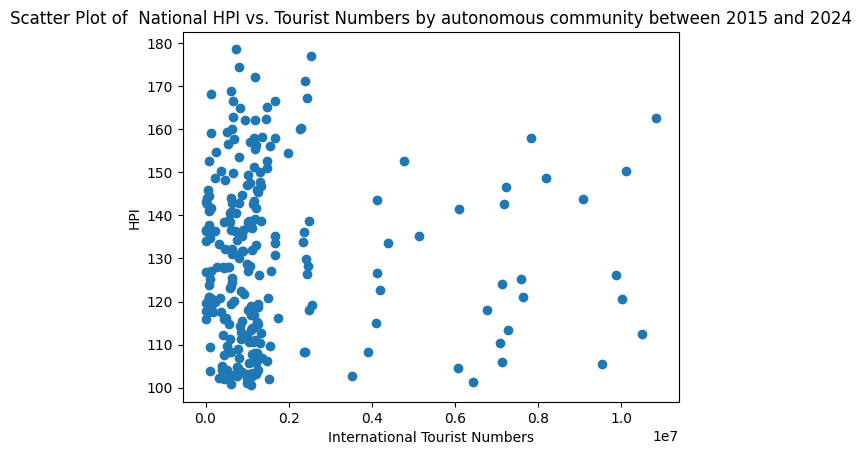

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_quarterly['Monthly_number_of_tourists'], df_quarterly['HPI'])

plt.xlabel('International Tourist Numbers')
plt.ylabel('HPI')
plt.title('Scatter Plot of  National HPI vs. Tourist Numbers by autonomous community between 2015 and 2024')

plt.show()

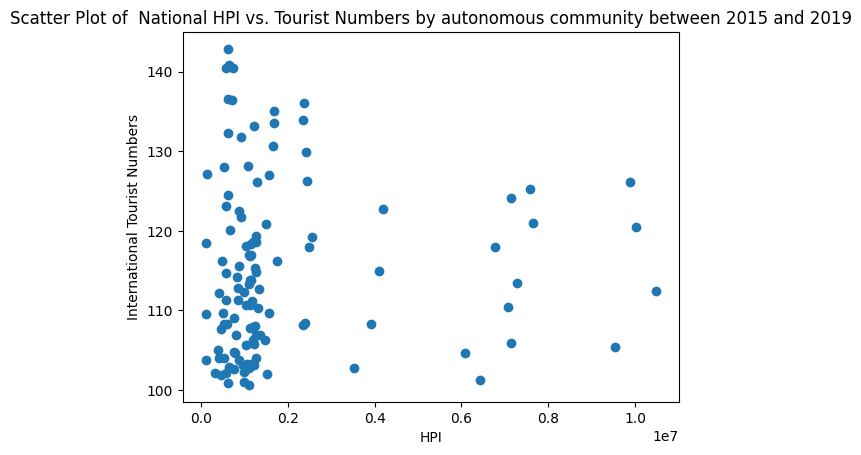

In [8]:

#taking out covid outliers
df_quarterly_no_covid = df_quarterly[df_quarterly['Period'].dt.year <= 2019]

plt.scatter(df_quarterly_no_covid['Monthly_number_of_tourists'], df_quarterly_no_covid['HPI'])

plt.xlabel('HPI')
plt.ylabel('International Tourist Numbers')
plt.title('Scatter Plot of  National HPI vs. Tourist Numbers by autonomous community between 2015 and 2019')

plt.show()

<ipython-input-10-44d47e93e2ab>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap


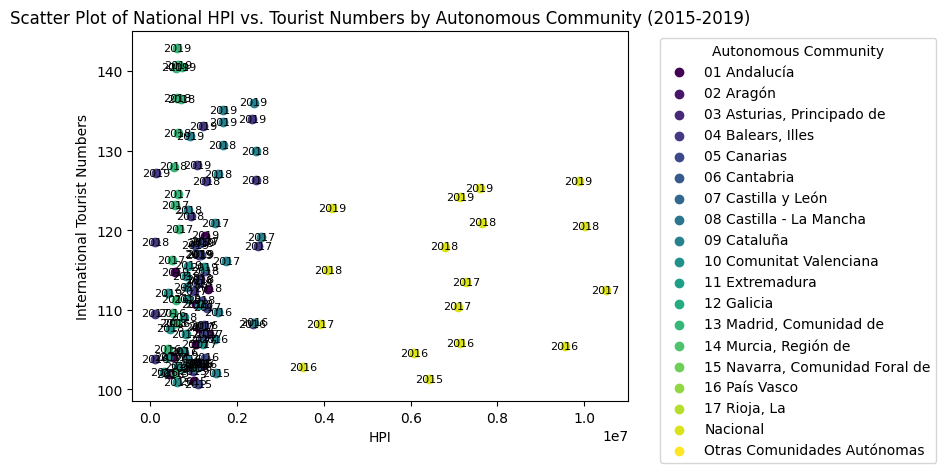

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Autonomous_community' is a column in your DataFrame
unique_communities = df_quarterly_no_covid['Autonomous_community'].unique()
colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap

fig, ax = plt.subplots()  # Create a figure and axes object

for i, community in enumerate(unique_communities):
    community_data = df_quarterly_no_covid[df_quarterly_no_covid['Autonomous_community'] == community]
    ax.scatter(community_data['Monthly_number_of_tourists'], community_data['HPI'],
               color=colors(i), label=community)

    # Label points with year
    for _, row in community_data.iterrows():
        ax.text(row['Monthly_number_of_tourists'], row['HPI'], row['Period'].year,
                fontsize=8, ha='center', va='center')

ax.set_xlabel('HPI')
ax.set_ylabel('International Tourist Numbers')
ax.set_title('Scatter Plot of National HPI vs. Tourist Numbers by Autonomous Community (2015-2019)')

# Add a legend
ax.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<ipython-input-11-b0b1cb18b18c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap


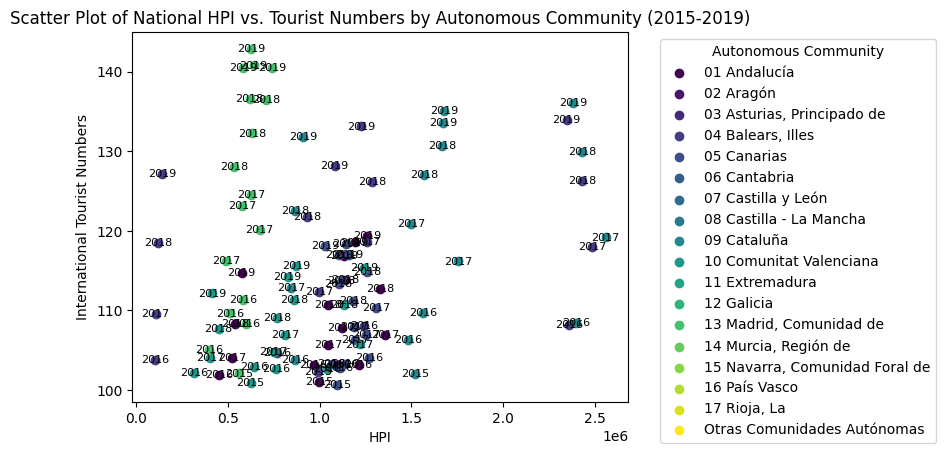

In [11]:
unique_communities = df_quarterly_no_covid['Autonomous_community'].unique()

# Remove "Nacional" from unique_communities
unique_communities = [community for community in unique_communities if community != 'Nacional']

colors = plt.cm.get_cmap('viridis', len(unique_communities))  # Choose a colormap

fig, ax = plt.subplots()  # Create a figure and axes object

for i, community in enumerate(unique_communities):
    community_data = df_quarterly_no_covid[df_quarterly_no_covid['Autonomous_community'] == community]
    ax.scatter(community_data['Monthly_number_of_tourists'], community_data['HPI'],
               color=colors(i), label=community)

    # Label points with year
    for _, row in community_data.iterrows():
        ax.text(row['Monthly_number_of_tourists'], row['HPI'], row['Period'].year,
                fontsize=8, ha='center', va='center')

ax.set_xlabel('HPI')
ax.set_ylabel('International Tourist Numbers')
ax.set_title('Scatter Plot of National HPI vs. Tourist Numbers by Autonomous Community (2015-2019)')

# Add a legend
ax.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [9]:

#import statsmodels.formula.api as sm
#from statsmodels.formula.api import ols
#from statsmodels.iolib.summary2 import summary_col

#creating very very basic regression analysis, with no confounding factors included
#model1 = ols('Tourist_numbers ~ General_HPI', data=merged_df_no_covid).fit()
#print(model1.summary())

NameError: name 'merged_df_no_covid' is not defined